<a href="https://colab.research.google.com/github/allaalmouiz/deepLearning_stroke_prediction/blob/main/deepLearning_stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stroke Risk Prediction Challange - Module 4
Submitted by: **`Alaa Almouiz F. Moh.`**

ID Number: **`S2026_176`**

Track: **Machine Learning**

For: **ZAKA ©**

## **1- Problem Statement (Objective)**

I’ve been asked to assist a public health organization in identifying individuals most at risk of having a stroke, using a dataset of patient information and health indicators.

So, I will build a Deep Learning **Binary Classification Model** to predicts whether a patient will experinece a stroke or not.


### **Dataset**
Stroke Risk Dataset (Downloaded  from Kaggle: [Data](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)), and been diwnloaded to [my repo](https://github.com/allaalmouiz/deepLearning_stroke_prediction/blob/739145a7bf7db1e6814682ae25a67beef25940fe/healthcare-dataset-stroke-data.csv).

The dataset variables include:
* `id`: Unique identifier for each patient.
* `gender`: Patient’s gender.
* `aga`: Age of the patient.
* `hypertension`:  if the patient has hypertension.
* `ever_married`: Marital status.
* `work_type`: Type of employment.
* `heart_disease`: if the patient has a history of heart disease.
* `Residence_type`: Patient’s area of residence.
* `avg_glucose_level`: Average blood glucose level.
* `bmi`: Body Mass Index.
* `smoking_status`: Patient’s smoking status.
* `stroke`Whether the patient experienced a stroke.


## **2- Dataset Loading**

In [1]:
# Clone the dataset from my Github Repo
! git clone https://github.com/allaalmouiz/deepLearning_stroke_prediction.git

%cd deepLearning_stroke_prediction

Cloning into 'deepLearning_stroke_prediction'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 471.61 KiB | 8.42 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/deepLearning_stroke_prediction


In [49]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



## **3- Exploring the Dataset**

In [4]:
# Loading the Dataset
df = pd.read_csv("/content/deepLearning_stroke_prediction/healthcare-dataset-stroke-data.csv")

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Removing the ID
df.drop("id", axis=1, inplace=True)

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Notice**:
I removed the `id` as it have high values, and will effect the performace of the model since it contain large index, that the model will mistaken its importance.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
print(f"The dataset has {df.shape[0]} rows (Samples), and {df.shape[1]} coulums (features)")

The dataset has 5110 rows (Samples), and 11 coulums (features)


**Notice**: There are missing values in  `bmi` only.

The **categorial values** are `gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status`. Also, `stroke`, `hypertension` and `heart_disease` are a categorical data, but here they're numerical and we have to cast type them.

The **Numerical Values** are `age`, `avg_glucose_level ` and `bmi` only.


In [10]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
print("Categorical Columns")
print(categorical)

print("")

numerical = list(df.dtypes[df.dtypes != 'object'].index)
print("Numerical Columns")
print(numerical)

Categorical Columns
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Numerical Columns
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [11]:
# Do the modification based on the Analysis Above
categorical = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke' ]
numerical = ['age','avg_glucose_level', 'bmi']

In [12]:
# Information about the data and it's values

print ("Information about the Categorical columns")
for col in df[categorical].columns:
    print(col)
    print("first 5 unique values", df[col].unique()[:5])
    print("unique values", df[col].nunique())
    print("")
print("======")

print ("Information about the Numerical columns")
for col in df[numerical].columns:
    print(col)
    print("first 5 unique values", df[col].unique()[:5])
    print("unique values", df[col].nunique())
    print("")


Information about the Categorical columns
gender
first 5 unique values ['Male' 'Female' 'Other']
unique values 3

ever_married
first 5 unique values ['Yes' 'No']
unique values 2

work_type
first 5 unique values ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
unique values 5

Residence_type
first 5 unique values ['Urban' 'Rural']
unique values 2

smoking_status
first 5 unique values ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
unique values 4

hypertension
first 5 unique values [0 1]
unique values 2

heart_disease
first 5 unique values [1 0]
unique values 2

stroke
first 5 unique values [1 0]
unique values 2

Information about the Numerical columns
age
first 5 unique values [67. 61. 80. 49. 79.]
unique values 104

avg_glucose_level
first 5 unique values [228.69 202.21 105.92 171.23 174.12]
unique values 3979

bmi
first 5 unique values [36.6  nan 32.5 34.4 24. ]
unique values 418



In [13]:
# Checking duplicating rows in teh dataset

df.duplicated().sum()

np.int64(0)

In [14]:
df[numerical].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


## **4- Cleaning the Dataset**

### Handling the Mssing values of `bmi`

In [15]:
bmi_mean = df["bmi"].mean()
df['bmi'] = df['bmi'].fillna(bmi_mean)
print(bmi_mean)
print(f"The null values in the bmi are {df['bmi'].isnull().sum()}")
print(" ")

28.893236911794666
The null values in the bmi are 0
 


Yayyyyy!! We fixed the null values in `bmi` coulmn.

### Encoding the categorical data

In [16]:
df[categorical].head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,Male,Yes,Private,Urban,formerly smoked,0,1,1
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1
2,Male,Yes,Private,Rural,never smoked,0,1,1
3,Female,Yes,Private,Urban,smokes,0,0,1
4,Female,Yes,Self-employed,Rural,never smoked,1,0,1


Checking the categorical data: **Ordinal-> LabelEncoder** or **Nominal -> OneHot Encoder**

I will One-hot encode:
`gender`, `work_type`, `smoking_status`.

And Label encode (0/1):
`ever_married`, `Residence_type`

In [17]:
binary_cols = [
    "ever_married",
    "Residence_type"
]

df[binary_cols] = df[binary_cols].replace({"Yes":1, "No":0, "Urban":1, "Rural":0})

df = pd.get_dummies(
    df,
    columns=["gender", "work_type", "smoking_status"],
    drop_first=True
)


/tmp/ipython-input-3847250666.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"Yes":1, "No":0, "Urban":1, "Rural":0})


In [18]:
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,True,False,False,True,False,False,True,False,False
1,61.0,0,0,1,0,202.21,28.893237,1,False,False,False,False,True,False,False,True,False
2,80.0,0,1,1,0,105.92,32.500000,1,True,False,False,True,False,False,False,True,False
3,49.0,0,0,1,1,171.23,34.400000,1,False,False,False,True,False,False,False,False,True
4,79.0,1,0,1,0,174.12,24.000000,1,False,False,False,False,True,False,False,True,False


In [19]:
dummy_cols = df.select_dtypes(include="bool").columns
df[dummy_cols] = df[dummy_cols].astype(int)

In [20]:
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,1,0,0,1,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,0,1,0,0,1,0
2,80.0,0,1,1,0,105.92,32.500000,1,1,0,0,1,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,1,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,28.893237,0,0,0,0,1,0,0,0,1,0
5106,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,0,1,0,0,1,0
5107,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,0,1,0,0,1,0
5108,51.0,0,0,1,0,166.29,25.600000,0,1,0,0,1,0,0,1,0,0


In [21]:
# Making the stroke the last column in the dataset

last = 'stroke'

# Creating a new list of columns with the target column at the end
new_column_order = [col for col in df.columns if col != last] + [last]

# Reindexing the DataFrame with the new column order
df = df[new_column_order]

In [22]:
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,1,0,0,1
1,61.0,0,0,1,0,202.21,28.893237,0,0,0,0,1,0,0,1,0,1
2,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,1,0,1
3,49.0,0,0,1,1,171.23,34.400000,0,0,0,1,0,0,0,0,1,1
4,79.0,1,0,1,0,174.12,24.000000,0,0,0,0,1,0,0,1,0,1


Now is the Dataset is ready for **visualization** and ready for **processing**

## **5- Visualization Stage**

### **A: Correlation Heat Map**

Text(0.5, 1.0, 'Features Correlation Heatmap')

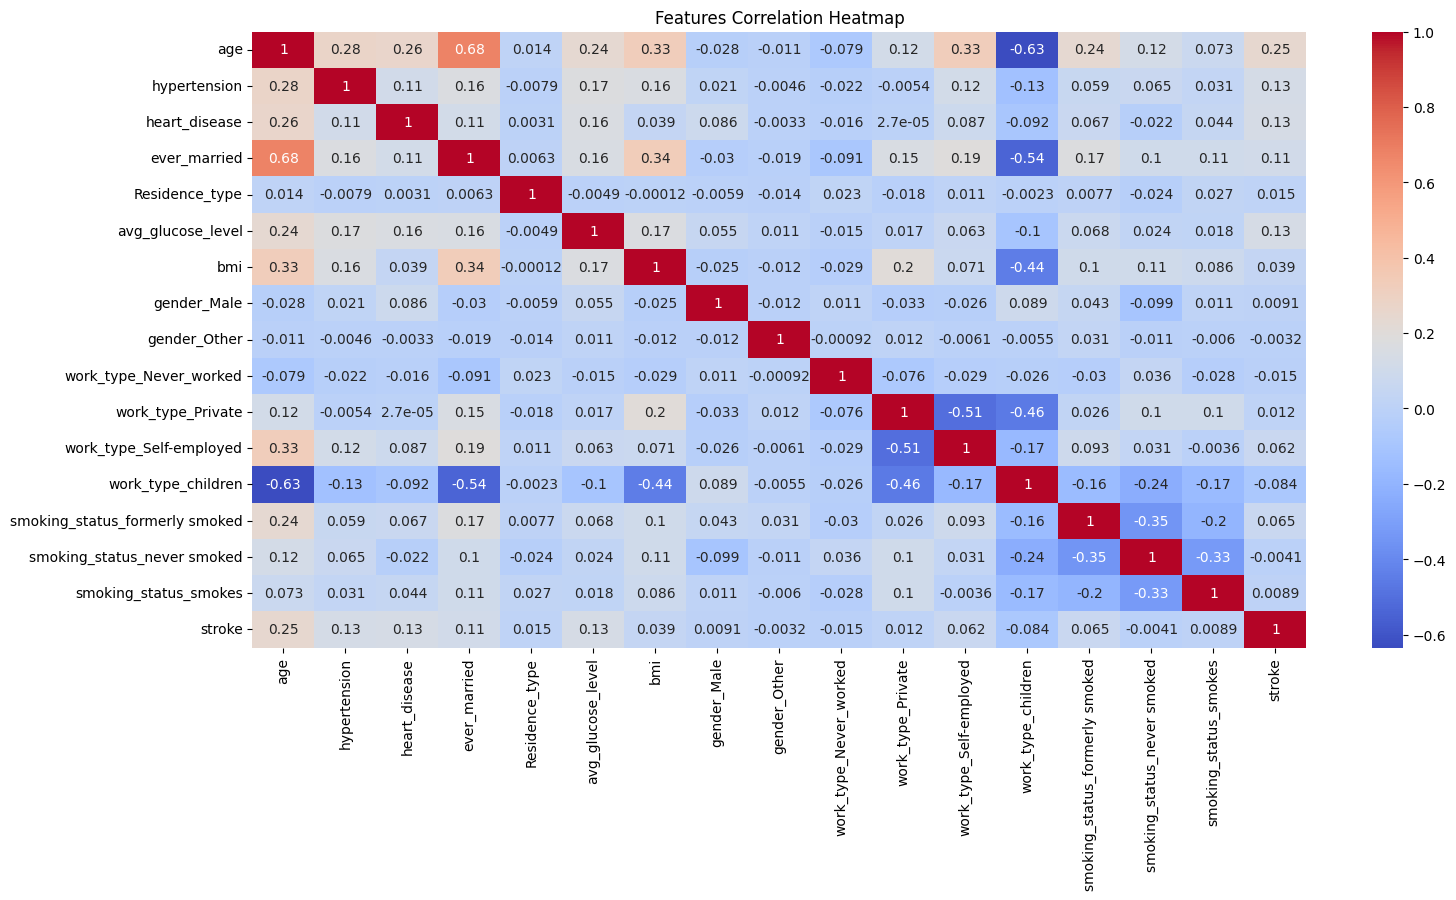

In [23]:
# Check the features relationships

plt.figure(figsize = (17, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Features Correlation Heatmap")

To see the **correaltion with other features** and stroke with a descending order.

In [24]:
corr = df.corr(numeric_only=True)["stroke"].sort_values(ascending=False)
print(corr)


stroke                            1.000000
age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
ever_married                      0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.038947
Residence_type                    0.015458
work_type_Private                 0.011888
gender_Male                       0.009117
smoking_status_smokes             0.008939
gender_Other                     -0.003166
smoking_status_never smoked      -0.004129
work_type_Never_worked           -0.014882
work_type_children               -0.083869
Name: stroke, dtype: float64


In [25]:
strong_corr = corr[abs(corr) > 0.1]
print(strong_corr)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
Name: stroke, dtype: float64


**Notice**: it's clear that most features that are corelated with `stroke` are:
`age`, `heart_disease`, `avg_glucose_level`, `hypertension` and `ever_married`

## **B: Stroke Analysis** - Histogram

Text(0, 0.5, 'Frequency')

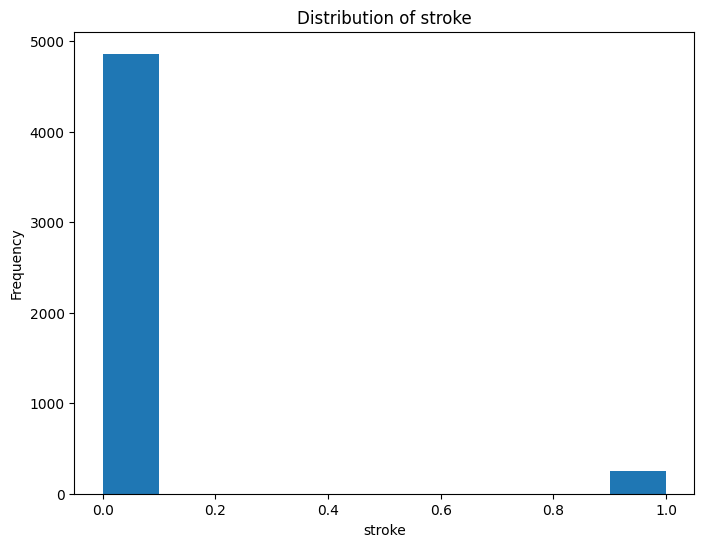

In [26]:
# A Histogram for stroke

plt.figure(figsize = (8,6))
df["stroke"].plot(kind="hist")
plt.title("Distribution of stroke")
plt.xlabel("stroke")
plt.ylabel("Frequency")


In [27]:
df["stroke"].value_counts()

,count
stroke,
0,4861
1,249


**Notice:** the histogram for `stroke` shows that the dataset is **imbalanced** since the people with no-stroke(0) are `4861`, and with stroke(1) are only `249`.

This would surely cause the model to predict no-stroke(0) more often than (1)

Solutions I might use:
- Evaluate with `F1 score` and `ROC–AUC`, not `accuracy`.
- `RandomOverSampler()` later on the training data.  

## **C: Distribution of Numerical categories - Histogram, and KDEs**


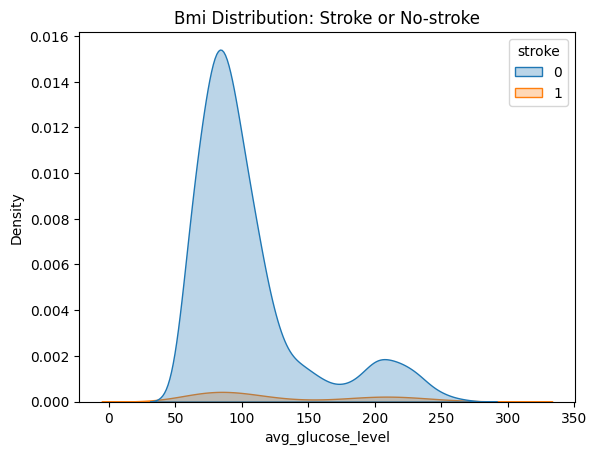

In [28]:
# KDE for the bmi based on if the person have stroke or not

sns.kdeplot(data=df, x="avg_glucose_level", hue="stroke", fill=True, alpha=0.3)
plt.title("Bmi Distribution: Stroke or No-stroke")
plt.show()

**Notice**: It's clear that the people with stroke(1) have more high and low ranges for glucose compared to the people with no-stroke(0) whom their glucose level is ranging in almost the normal range.

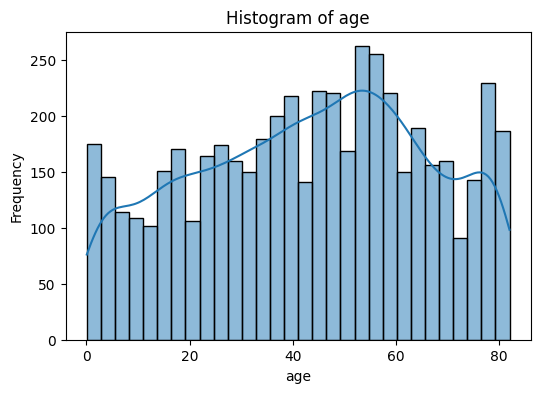

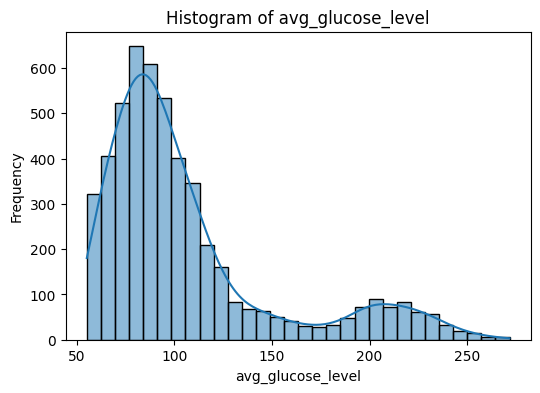

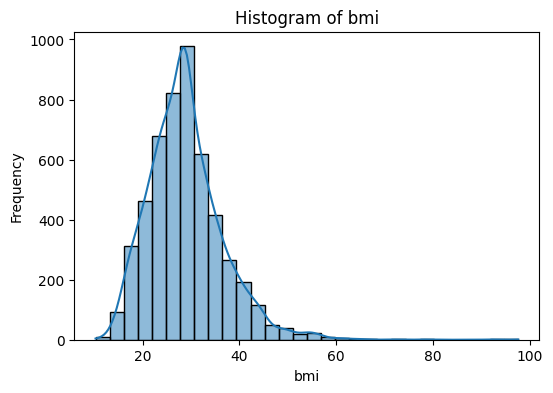

In [29]:
for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)  # kde=True adds a smooth curve
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Notice**

* `age`: distribution is almost an even distibution
* `bmi` and `avg_glucose_level` is a positive Skewed distribution.

Later, we will Standerdize the distribution, cause specially `bmi` and `avg_glucose_level` distribution I find them a troublesome a bit.

In [30]:
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,1,0,0,1
1,61.0,0,0,1,0,202.21,28.893237,0,0,0,0,1,0,0,1,0,1
2,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,1,0,1
3,49.0,0,0,1,1,171.23,34.400000,0,0,0,1,0,0,0,0,1,1
4,79.0,1,0,1,0,174.12,24.000000,0,0,0,0,1,0,0,1,0,1


### **D- Boxplots for numerical features `['age']` against `stroke`**

<Axes: xlabel='stroke', ylabel='age'>

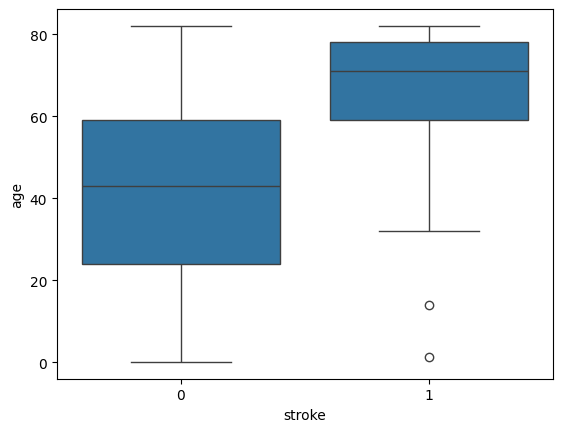

In [33]:
sns.boxplot(x="stroke", y="age", data=df)

**Notice:**

It's clear that `stroke` is clearly high on average for older people.

**More age** -> **higher stroke propapility.**

## **6- Building the Classification Neural Network Model**
Build a model that predicts whether an individual will have a stroke or not based on the other features.

**Part 1**
* **First Model:** Simple Classification model **(Baseline model)**.
* **Second Model:** Build a classification neural network.
* **Third Model:** Build a classification neural network using k-folds method.
* Analyze  how  the  model  performs  and  what patterns it may be capturing.

**Part 2**

Further imporvements for the classification model using:
* **Fourth Model**


### **Part 1**

### **First Model:** Simple Logistic classification model - I will start with a very simple structure to understand the model evolution through the different architecture **(Baseline model).**


In [32]:
df.shape

(5110, 17)

In [34]:
df.head(1)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,1,0,0,1


#### Splitting the dataset

In [59]:
X = df.iloc[:,:-1].values
Y = df.iloc[:, -1].values

In [60]:
print(f"The shape of X is {X.shape} and the shape of y is {Y.shape}")

The shape of X is (5110, 16) and the shape of y is (5110,)


In [61]:
# Splitting the dataset into training and testing splits.
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42)

In [62]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4088, 16), (1022, 16), (4088,), (1022,))

In [63]:
# Standerdizing the training dataset

scaler = StandardScaler()
X_model1_train_scaled = scaler.fit_transform(X_train)
X_model1_test_scaled = scaler.fit_transform(X_test)

In [64]:
# Building the logistic regression model

model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_model1_train_scaled, Y_train)
y_pred_model1 = model1.predict(X_model1_test_scaled)

In [65]:
# Evaluating the Classification Model

print("Results for Model 1 (Simple classification model using scikit-learn’s library, normal train_test_split, standerdization) ")
print("===============")
print("Accuracy:", accuracy_score(Y_test, y_pred_model1))
print("Recal Score:", recall_score(Y_test, y_pred_model1))
print("Precision Score:", precision_score(Y_test, y_pred_model1))
print("F1 Score:", f1_score(Y_test, y_pred_model1))
print("===============")
print("Classification Report: \n", classification_report(Y_test, y_pred_model1))


Results for Model 1 (Simple classification model using scikit-learn’s library, normal train_test_split, standerdization) 
Accuracy: 0.7514677103718199
Recal Score: 0.7903225806451613
Precision Score: 0.16896551724137931
F1 Score: 0.2784090909090909
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.17      0.79      0.28        62

    accuracy                           0.75      1022
   macro avg       0.58      0.77      0.56      1022
weighted avg       0.93      0.75      0.82      1022



**`Model1`Commenting in the results**

*(Simple classification model using scikit-learn’s library, normal train_test_split, standerdization)*


The dataset imbalance significantly influences model behavior. While the model achieves **high recall (79%) for the minority class (stroke)**, indicating that most true stroke cases are detected, it suffers from **very low precision (17%), meaning that a large proportion of predicted stroke cases are false positives.** This suggests that the model favors sensitivity over specificity, likely due to the class imbalance handling strategy. As a result, the decision boundary shifts toward predicting more positive cases, increasing false alarms.


To enhance the performance on this dataset, I will buil `model 2` that is using neural networks next.

### **Second Model:** Build a classification neural network.



In [67]:
# Building a Sequential neural network model

def build_model1():

  # Model layers: Input(16) -> hidden(16) -> Output(1)
  m = Sequential()
  m.add(Dense(16, input_dim = 16, activation='relu'))
  m.add(Dense(1, activation='sigmoid'))

  m.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics =["accuracy, "])

  return m

In [68]:
def train_model1(X, Y, batch_size):
  model = build_model1()
  history = model.fit(X,
                      Y,
                      validation_split=0.1,
                      epochs=5,
                      batch_size=batch_size,
                      verbose=0
  )
  return history

In [ ]:
history_model1 =

In [ ]:
# settings = {'Batch GD': x_train.shape[0], 'Mini-Batch': 128, 'SGD': 1}
settings = {'Batch GD': x_train.shape[0], 'Mini-Batch': 128, 'Mini-Batch-2': 64}

histories = {}

for name, batch_size in settings.items():
  print(f"Training {name} (batch_size={batch_size})...")
  histories[name] = train(Xbatch_size)